importing library

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

dataset preprocessing

In [30]:
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [31]:

exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [32]:
calories_data = pd.merge(calories, exercise, on='User_ID')
calories_data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [33]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [34]:
calories_data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: >

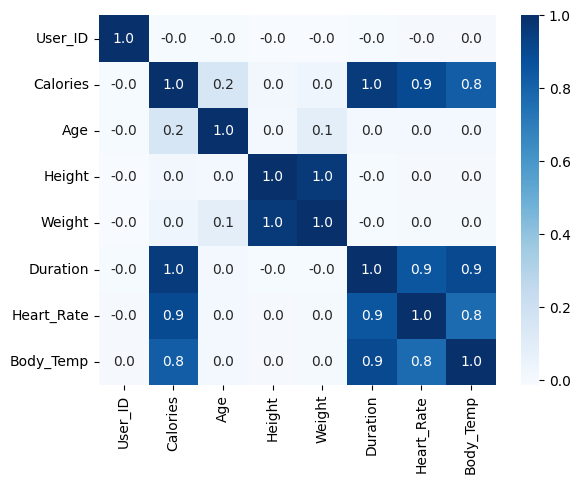

In [35]:
sns.heatmap(calories_data.corr(numeric_only=True), annot=True, fmt=".1f", cmap="Blues")

In [36]:
calories_data.replace({"Gender":{'male':0, 'female':1}}, inplace = True)
calories_data.head()

C:\Users\Gravity\AppData\Local\Temp\ipykernel_17484\2378415211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0, 'female':1}}, inplace = True)


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


In [37]:
X = calories_data.drop(columns = ['User_ID','Calories'], axis = 1)
Y = calories_data['Calories']
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting the data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

Training model

In [39]:
model = XGBRegressor()
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Testing model

In [40]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [41]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  1.4833678883314132


Model Performance

In [42]:

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# R² Score
r2_train = metrics.r2_score(Y_train, train_pred)
r2_test = metrics.r2_score(Y_test, test_pred)
print("R² Score (Train): ", r2_train)
print("R² Score (Test): ", r2_test)

# MAE
mae = metrics.mean_absolute_error(Y_test, test_pred)
print("Mean Absolute Error: ", mae)

# MSE
mse = metrics.mean_squared_error(Y_test, test_pred)
print("Mean Squared Error: ", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)


R² Score (Train):  0.9995691477017405
R² Score (Test):  0.998800624504713
Mean Absolute Error:  1.4833678883314132
Mean Squared Error:  4.710710012461346
Root Mean Squared Error:  2.1704170134933394


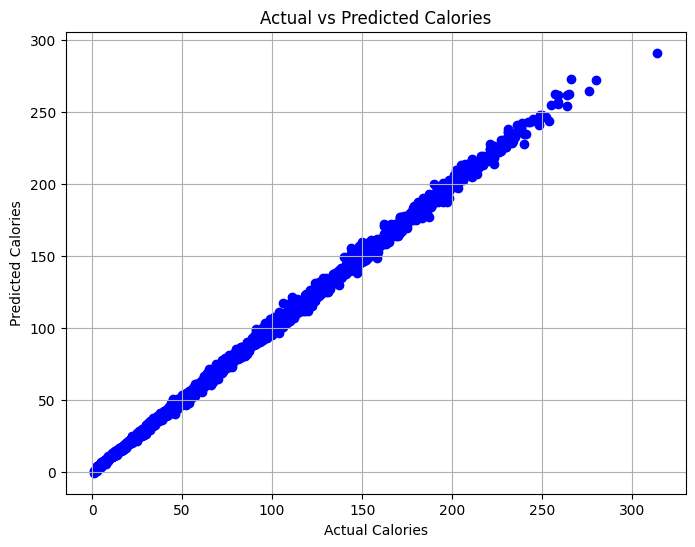

In [43]:

plt.figure(figsize=(8,6)); plt.scatter(Y_test, test_pred, c='blue');
plt.xlabel("Actual Calories"); plt.ylabel("Predicted Calories");
plt.title("Actual vs Predicted Calories");
plt.grid(True);
plt.show()


In [44]:
input_data = (1, 25, 167, 62, 25, 95, 40.8)   # sample values

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1, -1)


prediction = model.predict(input_data_reshaped)
print("Calories Burned Prediction:", prediction[0])

Calories Burned Prediction: 120.71275


In [46]:
import pickle
model.save_model("model.json")
print("Model saved as model.pkl")

Model saved as model.pkl
